# Graphics

This file creates graphic outputs of descriptive statistics for each neighborhood and tract.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
master = pd.read_csv('../inputs/master.csv')
master

,id,date,available,price,minimum_nights,room_type,census_tract,census_NBH
0,3781,2023-03-19,f,125.0,32.0,Entire home/apt,512.0,East Boston
1,3781,2023-03-20,f,125.0,32.0,Entire home/apt,512.0,East Boston
2,3781,2023-03-21,f,125.0,32.0,Entire home/apt,512.0,East Boston
3,3781,2023-03-22,f,125.0,32.0,Entire home/apt,512.0,East Boston
4,3781,2023-03-23,f,125.0,32.0,Entire home/apt,512.0,East Boston
...,...,...,...,...,...,...,...,...
1410018,2021483,2024-03-13,f,500.0,1.0,Entire home/apt,608.0,South Boston
1410019,2021483,2024-03-14,f,500.0,1.0,Entire home/apt,608.0,South Boston
1410020,2021483,2024-03-15,f,500.0,1.0,Entire home/apt,608.0,South Boston
1410021,2021483,2024-03-16,f,500.0,1.0,Entire home/apt,608.0,South Boston


In [80]:
master_short = pd.read_csv('../inputs/master_short.csv')
master_short

,id,room_type,census_tract,census_NBH
0,3781,Entire home/apt,512.00,East Boston
1,5506,Entire home/apt,814.00,Roxbury
2,6695,Entire home/apt,814.00,Roxbury
3,8789,Entire home/apt,203.02,Beacon Hill
4,4765070,Entire home/apt,812.00,Jamaica Plain
...,...,...,...,...
3859,1956275,Entire home/apt,1201.05,Jamaica Plain
3860,2000797,Private room,912.00,Dorchester
3861,2014651,Private room,1202.01,Jamaica Plain
3862,2014882,Private room,4.02,Brighton


## Vacancy

In [67]:
# select neighborhood

master_filt = master.loc[master['census_NBH'] == 'East Boston'].reset_index()

master_filt['vacant'] = np.where(master_filt['available'] == 't', 'vacant', 'booked')

sum = master_filt['vacant'].value_counts().sum()
vac = master_filt['vacant'].value_counts()['vacant']

vac_rate = (vac / sum).round(2)
vac_rate

0.45

<Axes: xlabel='count', ylabel='available'>

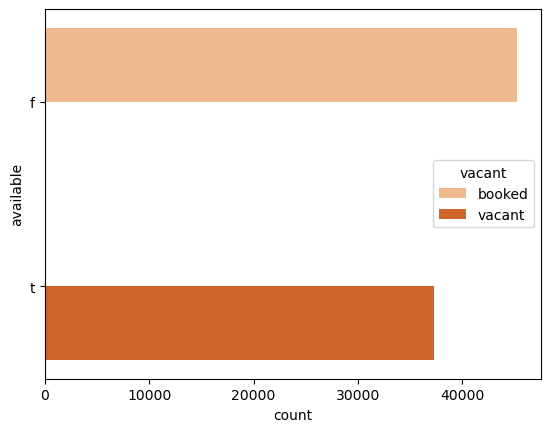

In [68]:
sns.countplot(data = master_filt,
              y = 'available',
              hue = 'vacant',
              palette = 'Oranges')

In [69]:
# select tract

master_filt = master.loc[master['census_tract'] == 512].reset_index()

master_filt['vacant'] = np.where(master_filt['available'] == 't', 1, 0)      # 1 = vacant
                                                                             # 0 = booked

sum = master_filt['vacant'].value_counts().sum()
vac = master_filt['vacant'].value_counts()[1]

vac_rate = (vac / sum).round(2)
vac_rate

0.62

<Axes: xlabel='count', ylabel='available'>

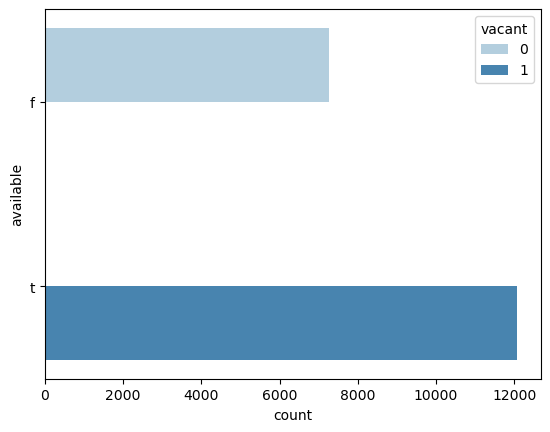

In [70]:
sns.countplot(data = master_filt,
              y = 'available',
              hue = 'vacant',
              palette = 'Blues')

## Room Types

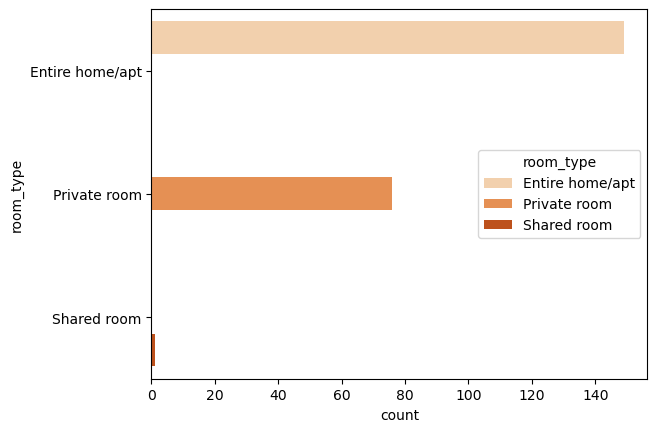

In [81]:
# select neighborhood

master_short_filt = master_short.loc[master_short['census_NBH'] == 'East Boston'].reset_index()

ax = sns.countplot(data = master_short_filt,
                   y = 'room_type',
                   hue = 'room_type',
                   palette = 'Oranges')

sns.move_legend(ax, "center right")

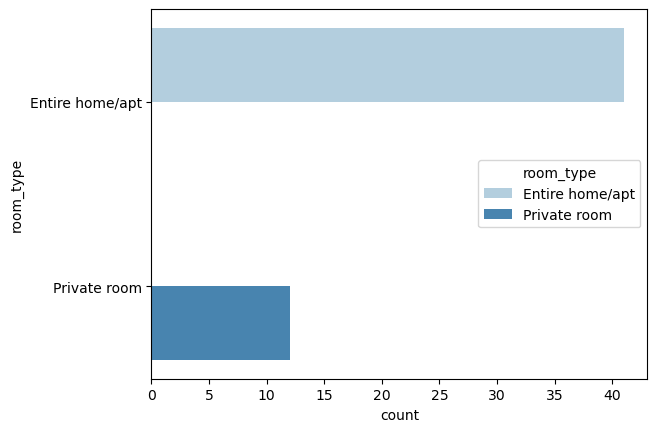

In [82]:
# select tract

master_short_filt = master_short.loc[master_short['census_tract'] == 512].reset_index()

ax = sns.countplot(data = master_short_filt,
                   y = 'room_type',
                   hue = 'room_type',
                   palette = 'Blues')

sns.move_legend(ax, "center right")

## Rental Length

In [83]:
master_filt = master.loc[master['census_NBH'] == 'East Boston'].reset_index()

ax = sns.countplot(data = master_short_filt,
              x = 'minimum_nights',
              hue = 'minimum_nights',
              palette = 'Blues')

sns.move_legend(ax, "center right")

ValueError: Could not interpret input 'minimum_nights'